Generating data file path.
File path generation completed.
Others     0
fr         1
en        29
Name: tweet_language, dtype: int64
Others                       0
Zapier.com                   1
Semrush Social Media Tool    1
Sprout Social                1
Echobox                      1
Emplifi                      1
Twitter Media Studio         1
The Tweeted Times            1
Twitter for Android          1
SocialFlow                   2
WordPress.com                2
Twitter for iPhone           5
SocialNewsDesk               5
Twitter Web App              8
Name: tweet_source, dtype: int64
Index(['tweet_id', 'tweet_text', 'tweet_time', 'tweet_author_id',
       'tweet_language', 'retweet_count', 'reply_count', 'like_count',
       'quote_count', 'tweet_source', 'negative_score', 'neutral_score',
       'positive_score', 'net_score'],
      dtype='object')


,tweet_id,tweet_text,tweet_time,tweet_author_id,tweet_language,retweet_count,reply_count,like_count,quote_count,tweet_source,negative_score,neutral_score,positive_score,net_score
0,1567151913602269184,https://t.co/OuIxTYJjsQ\nAlways good to get im...,2022-09-06 14:05:07+00:00,724633794,en,0,0,0,0,Twitter Web App,0.022226,0.338415,0.639359,Positive
1,1567151655560388608,"🩸 After Roe v. Wade was overturned, US women s...",2022-09-06 14:04:05+00:00,252751061,en,1,0,1,0,SocialFlow,0.439956,0.527343,0.032701,Neutral
2,1567151271232110592,With the overturning of Roe v Wade we will be ...,2022-09-06 14:02:33+00:00,28863408,en,0,0,0,0,Twitter for iPhone,0.117651,0.798251,0.084098,Neutral
3,1567150906902208512,Pro-Lifers cite Christianity to explain anti-a...,2022-09-06 14:01:07+00:00,1329506226900754434,en,0,0,0,0,Zapier.com,0.391924,0.585381,0.022695,Neutral
4,1567150877508501504,The United States is a global outlier for abor...,2022-09-06 14:01:00+00:00,1109933379217252353,en,0,0,0,0,Semrush Social Media Tool,0.896433,0.098928,0.004639,Negative


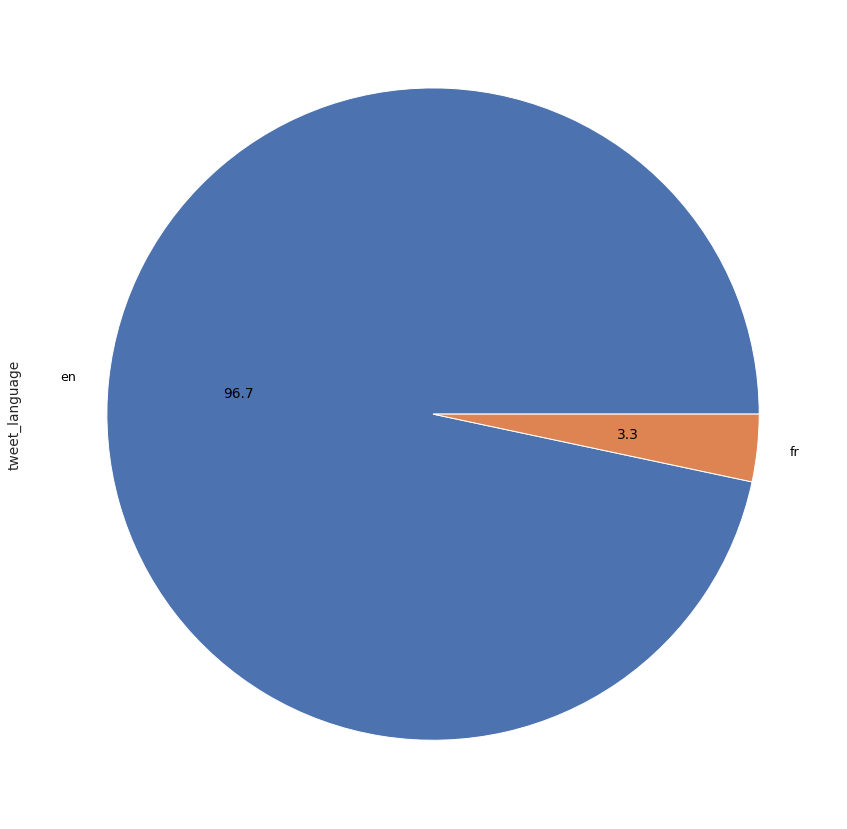

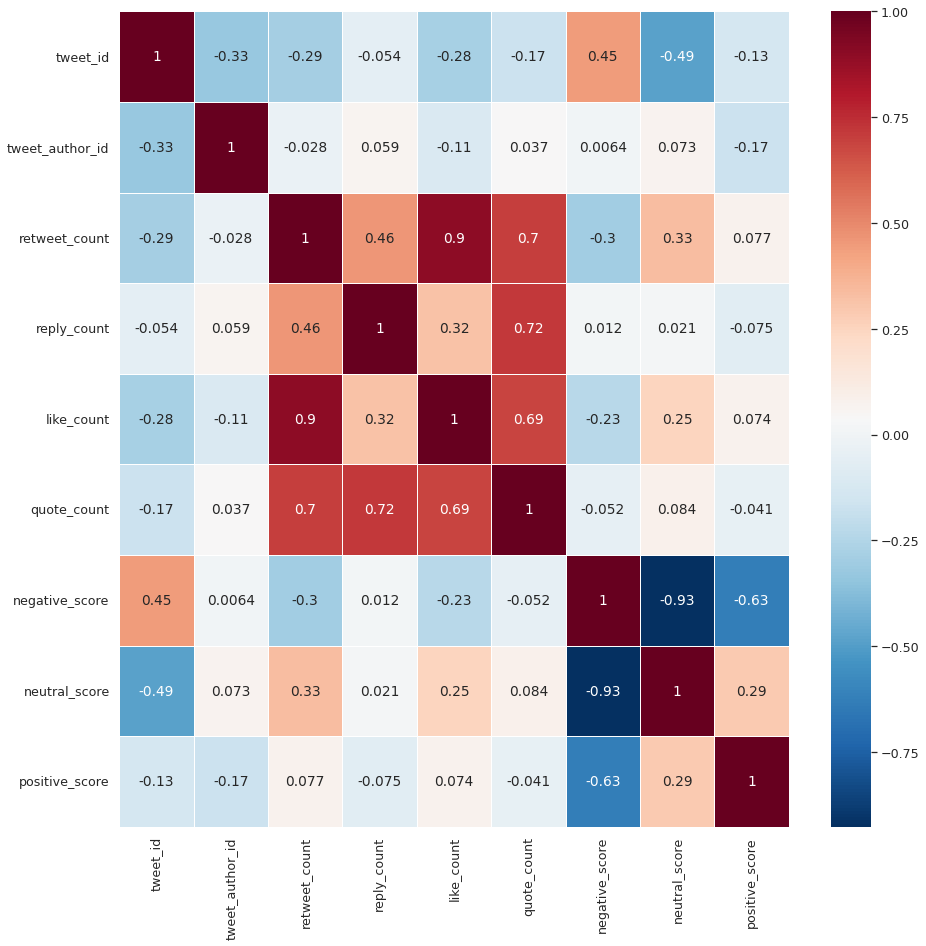

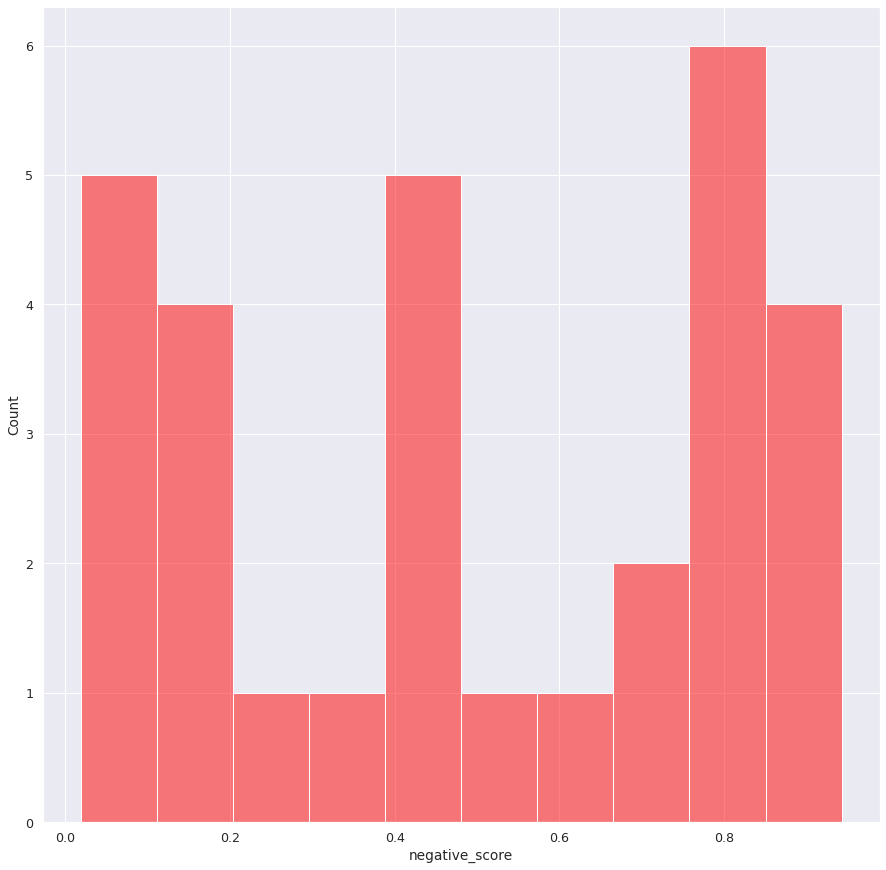

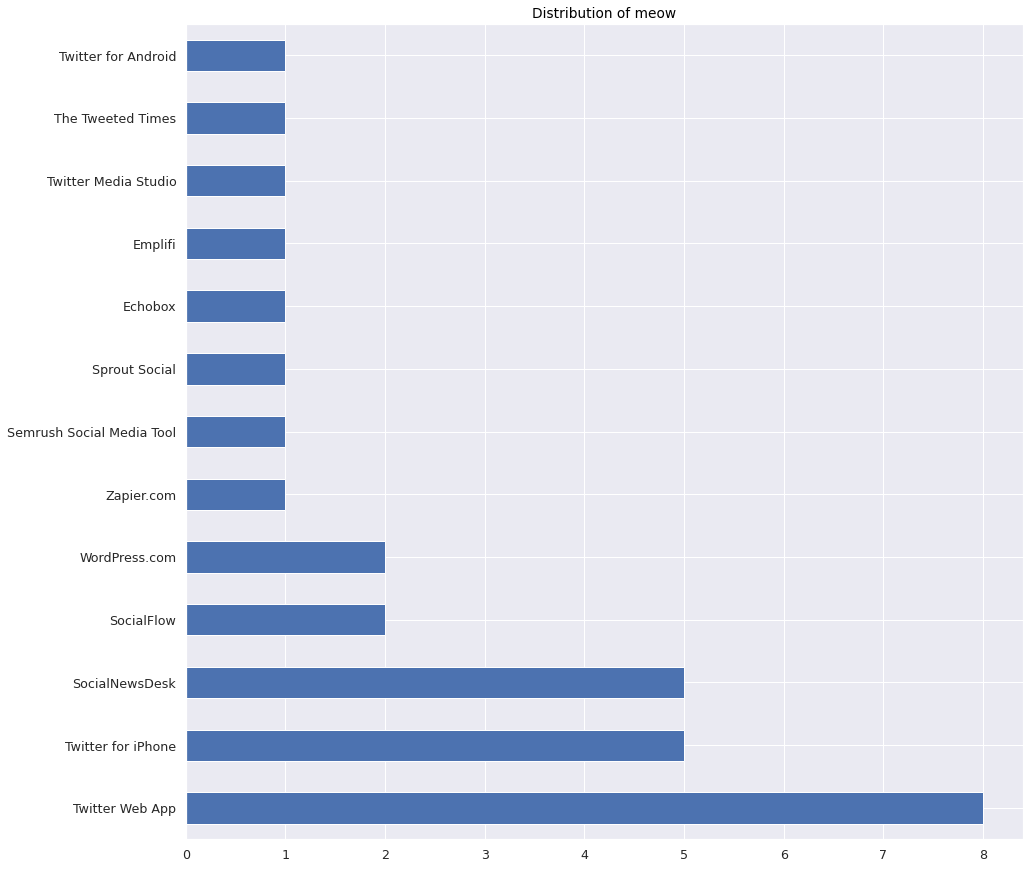

In [4]:
import os, json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

def file_path(rel_path, data_file):
    '''
    Form paths using os library and user inputs
    Dependencies - None
    '''
    # Create path to data files
    print("Generating data file path.")
    data_dir = os.path.abspath(rel_path)
    data_path = os.path.join(data_dir,data_file)
    print('File path generation completed.')
    return data_path

# Class attributes and methods
class tweet_analysis:

    # Seaborn configuration/design parameters     
    sns.set(rc={"figure.figsize":(15,15),
                "figure.facecolor":"ffffff",
                "text.color":"black"},
                style='darkgrid',
                font_scale=1.15)

    '''
    Analysis class for objects containing tweet data, statistics and charts
    '''
    def __init__(self,df):
        self.df = df
        self.series_entries_count=self.count_series_entries()
        self.series_entry_count = self.count_series_entries()
        self.neg_tweet_counts = self.df['negative_score']
        self.pos_tweet_counts = self.df['positive_score']
        self.neut_tweet_counts = self.df['neutral_score']
        self.net_sent_tweet_counts = self.series_entries_count['net_score']
        self.lang_counts = self.series_entries_count['tweet_language']
        self.lang_counts_grouped = self.group_low_count_data(self.series_entry_count['tweet_language'], 0.15)
        self.tweet_source_counts = self.series_entries_count['tweet_source']
        self.tweet_source_counts_grouped = self.group_low_count_data(self.series_entry_count['tweet_source'], 0.15)
        self.corr_data = df.corr()
        self.shape = df.shape
        self.size = df.size
        self.dtypes = df.dtypes
        self.colums = df.columns
        self.null_vaue_count = df.isnull().sum()
        self.prelim_stats = df.describe()

    def count_series_entries(self):
        '''
        Count the number of times each pattern occurs in each string column
        eg. Count number of times each language occurs in a collection of tweets
        Dependencies - None
        '''
        series_entry_count = {}
        df_series_lst = list(df.columns[df.dtypes == 'object'])
        exception_lst = ['tweet_id', 'tweet_text']
        for series in df_series_lst:
            if series not in exception_lst:
                series_entry_count[series] = self.df[series].value_counts()
        return series_entry_count

    def group_low_count_data(self, pd_series, cutoff_percent):
        '''
        To prevent overcrowding of pie charts:
        1. Filter and group data with low counts (i.e. categories with small area on pie chart)
        2. What is considered a 'small' area is defined by the user by specifying a threshold percentage (frctnl_lmt)
        3. Values below the threshold value are represented under the category 'Others'
        '''
        cutoff_fraction = cutoff_percent / 100
        pd_series_count = pd_series.sum()
        pd_series_proc = pd_series[pd_series > (cutoff_fraction*pd_series_count)]
        pd_series_proc['Others'] = pd_series[pd_series <= (cutoff_fraction*pd_series_count)].sum()
        pd_series_proc.sort_values(inplace=True)
        print(pd_series_proc)
        return pd_series_proc

    def draw_pie_chart(self,data,title=None):
        fig, axis = plt.pyplot.subplots()
        graph_params={'kind':'pie','figsize':(20,15),'autopct':'%.1f','title':title,'ax':axis}
        data.plot(**graph_params)

    def draw_barh_chart(self,data):
        fig, axis = plt.pyplot.subplots()
        graph_params={'kind':'barh','figsize':(15,15),'title':"Distribution of meow",'ax':axis}
        data.plot(**graph_params)

    def draw_hist_chart(self,data,bins,color):
        fig, axis = plt.pyplot.subplots(figsize=(15,15))
        graph_params={'x':data, 'bins':bins,'color':color,'alpha':0.5,'data':self.df,'ax':axis}
        sns.histplot(**graph_params)

    def draw_corr_chart(self,corr_data):
        fig, axis = plt.pyplot.subplots(figsize=(15,15))
        graph_params={'data':corr_data,'cmap' : 'RdBu_r','xticklabels':corr_data.columns,
        'yticklabels':corr_data.columns,'linewidth' : 0.5,'annot' : True, 'ax':axis}
        sns.heatmap(**graph_params)   

###################################################################################################################

        
fname = 'test_with_sentiments.json'
df = pd.read_json(file_path("data/", fname))        
a1 = tweet_analysis(df)


# print(a1.tweet_source_counts)
# print(a1.tweet_source_counts_grouped)
a1.draw_pie_chart(a1.lang_counts)
a1.draw_corr_chart(a1.corr_data)
a1.draw_hist_chart('negative_score',10,'red')
# print(a1.tweet_source_counts)
a1.draw_barh_chart(a1.tweet_source_counts)
print(a1.colums)
df.head()


In [11]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 